In [1]:
import numpy as np
import sympy

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib notebook

In [2]:
def f(x):
    return 1.0 / (1.0 + 25*x**2)

n = 15
xx = np.linspace(-1, 1, n)
yy = f(xx)


In [3]:
def lagrange_k(xval, xk, k):
    n = len(xk)
    num, den = 1.0, 1.0 
    for j in range(n):
        if j == k: 
            continue
        den *= (xk[k] - xk[j])
        num *= (xval - xk[j])
    return num / den


def lagrange(xval, xk, yk):
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))

In [4]:
def plot_interp(f, n, add_legend=True):
    # tabulate
    xx = np.linspace(-1, 1, n)
    yy = f(xx)
    
    # interpolate & evaluate on a finer grid
    xn = np.linspace(-1, 1, 201)
    yn = [lagrange(_, xx, yy) for _ in xn]
    
    # plot
    plt.plot(xn, yn, '-', alpha=0.7, label=r'interp, $n= %s$' % n)
    plt.plot(xn, f(xn), label=r'$f(x)$')
    plt.plot(xx, yy, 'o', ms=7)
    
    plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
    if add_legend:
        plt.legend(loc='best')

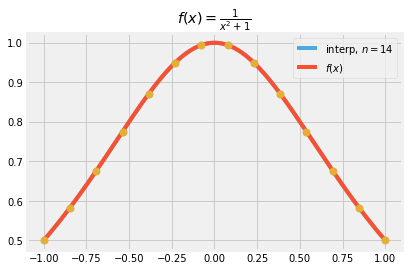

In [5]:
plot_interp(lambda x: 1/(1 + x**2), 14)

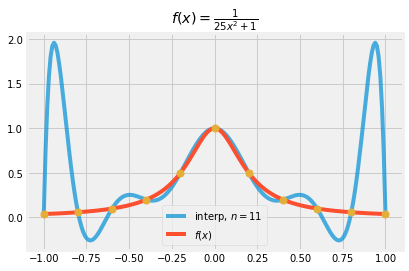

In [6]:
plot_interp(lambda x: 1 / (1 + 25*x**2), 11)

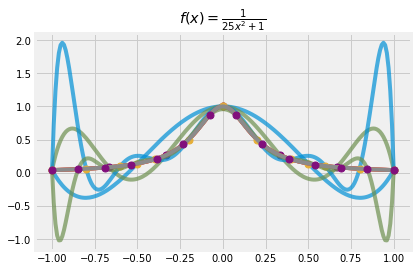

In [7]:
for n in [5, 7, 11, 14]:
    plot_interp(lambda x: 1/(1+25*x**2), n, add_legend=False)

# Numerical stability of high order polynomials

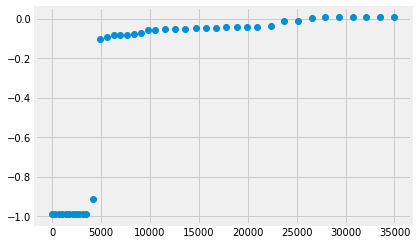

In [8]:
# https://github.com/scipy/scipy/issues/3854

xi = [     0.,    349.,    698.,   1047.,   1396.,   1746.,   2095.,
         2444.,   2793.,   3142.,   3492.,   4190.,   4889.,   5587.,
         6285.,   6984.,   7682.,   8381.,   9079.,   9778.,  10476.,
        11524.,  12571.,  13619.,  14667.,  15714.,  16762.,  17810.,
        18857.,  19905.,  20953.,  22350.,  23746.,  25143.,  26540.,
        27937.,  29334.,  30731.,  32128.,  33525.,  34921.]

yi = [-0.99      , -0.98961838, -0.98749461, -0.98666501, -0.98641613,
       -0.98628339, -0.98611747, -0.98610088, -0.98583541, -0.98583541,
       -0.98556994, -0.91289696, -0.1005857 , -0.09056413, -0.08454123,
       -0.08233449, -0.08079144, -0.07750622, -0.07218019, -0.05817654,
       -0.05573751, -0.05263481, -0.05085947, -0.04979758, -0.04759084,
       -0.04757425, -0.04443836, -0.04264642, -0.0424971 , -0.04214866,
       -0.04019081, -0.03620873, -0.01135391, -0.01050772,  0.00465738,
        0.00857309,  0.00903766,  0.00948565,  0.00963498,  0.00981749,
        0.01      ]

plt.plot(xi, yi, 'o')

In [9]:
len(xi)

41

(-1.1, 0.1)

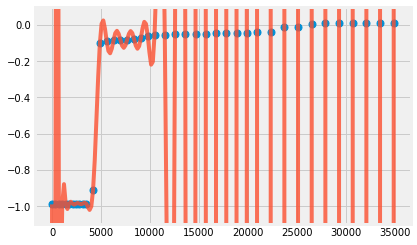

In [10]:
# interpolate with a polynomial of degree 41

from scipy.interpolate import KroghInterpolator
fff = KroghInterpolator(xi, yi)

xn = np.linspace(min(xi), max(xi), 201)
yn = fff(xn)

plt.plot(xi, yi, 'o', ms=7)
plt.plot(xn, yn, '-', alpha=0.8)
plt.ylim(-1.1, 0.1)

In [11]:
# Check the residuals: all should be zero

[fff(x) - y for x, y in zip(xi, yi)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.1102230246251565e-16,
 0.0,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 2.3314683517128287e-15,
 1.3586354263850353e-14,
 -9.872658246479205e-14,
 -1.075112221471386e-13,
 -9.76156655507765e-12,
 -3.73213265847383e-11,
 -8.723785582809285e-11,
 1.325821119557702e-10,
 1.5391206711901084e-09,
 3.9949355122581576e-08,
 5.029937934844519e-07,
 3.859754638672885e-06,
 3.922122802736683e-06,
 3.067749023435984e-06,
 0.0008745172265625031,
 0.004537594316406247,
 -0.003218232031249997,
 -0.29623024625,
 0.71597206,
 8.030349355,
 -27.19177109,
 -35.80199228,
 -375.37965738,
 -17749.00857309,
 -124844.00903766,
 -28668.00948565,
 1859567.99036502,
 3118111.99018251,
 43217535.99]

# Cubic splines

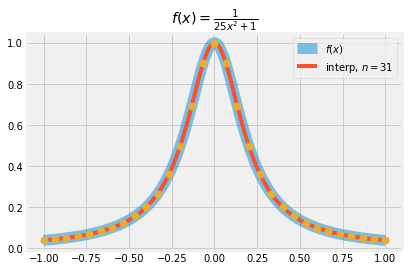

In [12]:
def f(x):
    return 1 / (1 + 25*x**2)


# tabulate
n = 31
xx = np.linspace(-1, 1, n)
yy = f(xx)
    
# interpolate & evaluate on a finer grid
from scipy.interpolate import CubicSpline
spl = CubicSpline(xx, yy)

xn = np.linspace(-1, 1, 201)
yn = spl(xn)

# plot
plt.plot(xn, f(xn), label=r'$f(x)$', lw=11, alpha=0.5)
plt.plot(xn, yn, '-', label=r'interp, $n= %s$' % n)
plt.plot(xx, yy, 'o', ms=7)

plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
plt.legend(loc='best')

## Data with jumps

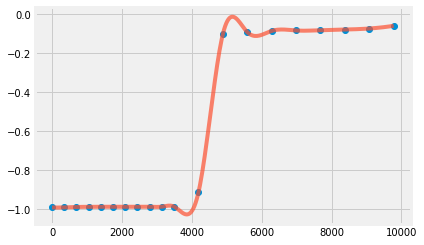

In [13]:
xxi = xi[:20]
yyi = yi[:20]

spl = CubicSpline(xxi, yyi)

plt.plot(xxi, yyi, 'o')

xx = np.linspace(min(xxi), max(xxi), 301)
plt.plot(xx, spl(xx), '-', alpha=0.7)

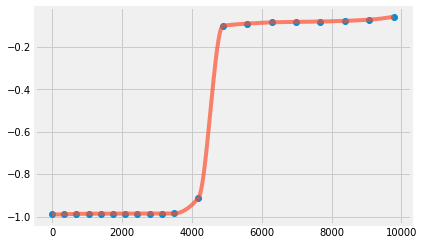

In [14]:
from scipy.interpolate import Akima1DInterpolator

ak = Akima1DInterpolator(xxi, yyi)
pch = PchipInterpolator(xxi, yyi)

plt.plot(xxi, yyi, 'o')
plt.plot(xx, ak(xx),'-', alpha=0.7)


# Practice: try PCHIP

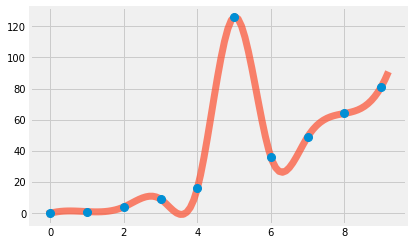

In [15]:
x = np.arange(10)
y = x**2
y[5] += 101

fig, ax = plt.subplots()

ax.plot(x, y, 'o', ms=8, zorder=101)

xx = np.linspace(-0.1, 9.2, 101)
ax.plot(xx, CubicSpline(x, y)(xx), '-', lw=7, alpha=0.7)


### Use PCHIP to interpolate the data below

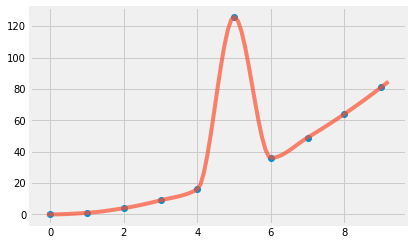

In [18]:
from scipy.interpolate import PchipInterpolator
pch = PchipInterpolator(x, y)

plt.plot(x, y, 'o')
plt.plot(xx, pch(xx),'-', alpha=0.7)